In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data=pd.read_csv('Diwali Sales Data.csv',encoding='unicode_escape')

In [27]:
data.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [28]:
data.shape

(11251, 15)

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


# Data Cleaning

In [30]:
# Removing Extra Column
data.drop(columns=['Status','unnamed1'],inplace=True)

In [31]:
data.isnull().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [32]:
# Removing the row which contains the NaN value
data.dropna(inplace=True)

In [33]:
data.isnull().sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

In [34]:
# Chnaging Datatype of Column
data['Amount']=data['Amount'].astype(int)

In [35]:
data['Amount'].dtypes

dtype('int32')

In [36]:
data.rename(columns={'Marital_Status':'Married'},inplace=True)

In [37]:
data.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Married', 'State', 'Zone', 'Occupation', 'Product_Category', 'Orders',
       'Amount'],
      dtype='object')

In [38]:
data[['Age','Orders','Amount']].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


# Exploratory Data Analysis

# Gender

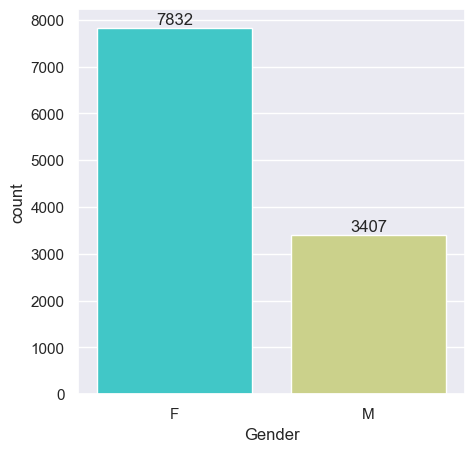

In [50]:
gender_plot = sns.countplot(x='Gender',data=data,palette='rainbow')
sns.set(rc={'figure.figsize':(5,5)})
# to show the values
for val in gender_plot.containers:
    gender_plot.bar_label(val)

**Insights : Women Customer is more than Men Customer**

In [40]:
gen_sales=data.groupby(['Gender'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)  # Gender wise total sale

In [18]:
gen_sales

,Gender,Amount
0,F,74335853
1,M,31913276


<Axes: xlabel='Gender', ylabel='Amount'>

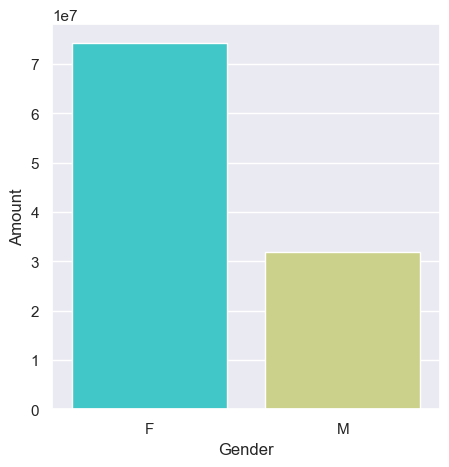

In [49]:
sns.set(rc={'figure.figsize':(5,5)})
sns.barplot(x='Gender',y='Amount',data=gen_sales,palette='rainbow')

**Insights : The Amount of Purchase of women is more than the men**

# Age

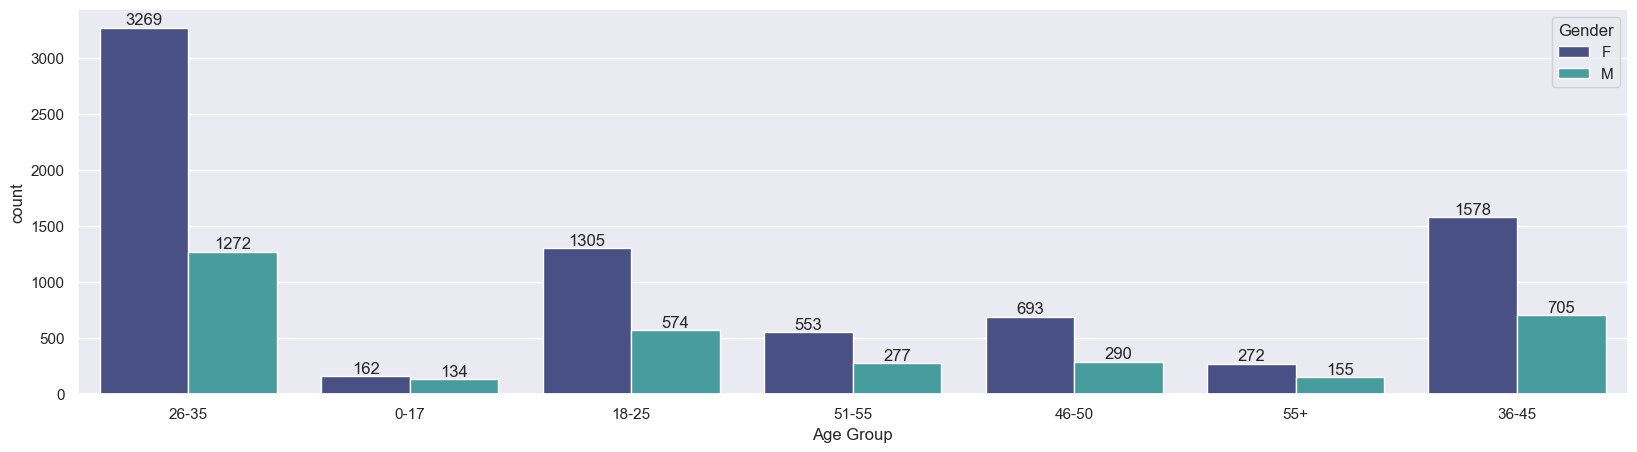

In [42]:
age_plot=sns.countplot(x='Age Group',data=data,hue='Gender',palette='mako')

for val in age_plot.containers:
    age_plot.bar_label(val)

In [21]:
age_sales=data.groupby(['Age Group'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)

<Axes: xlabel='Age Group', ylabel='Amount'>

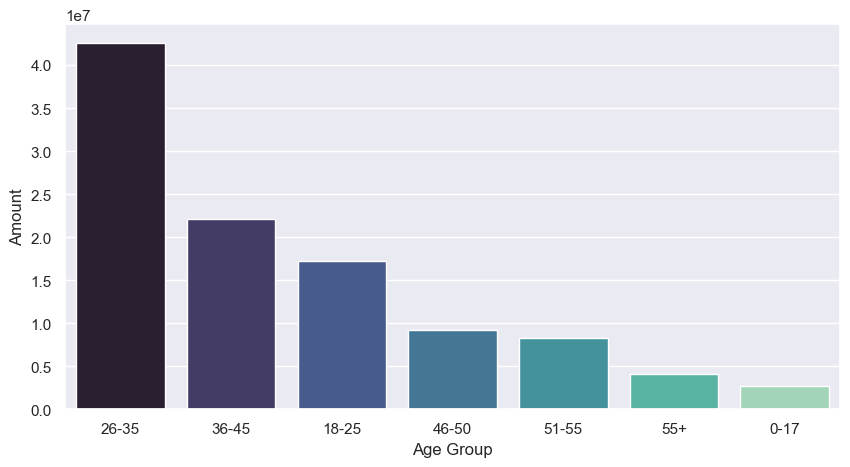

In [52]:
sns.set(rc={'figure.figsize':(10,5)})
sns.barplot(x='Age Group',y='Amount',data=age_sales,palette='mako')  

**Insights : The Amount of Purchase is between 26-35 and women**

# State

<Axes: xlabel='State', ylabel='Orders'>

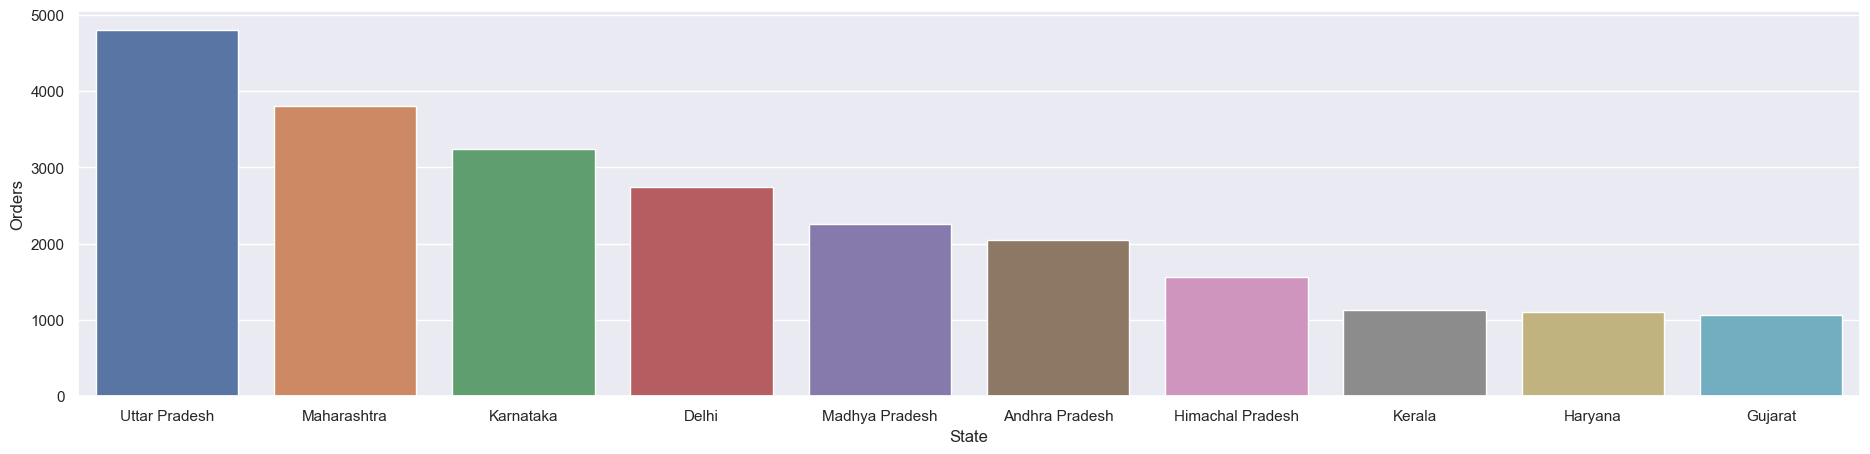

In [44]:
state_orders=data.groupby(['State'],as_index=False)['Orders'].sum().sort_values(by='Orders',ascending=False).head(10) # State wise order

sns.set(rc={'figure.figsize':(23,5)})
sns.barplot(data=state_orders,x='State',y='Orders')

<Axes: xlabel='State', ylabel='Amount'>

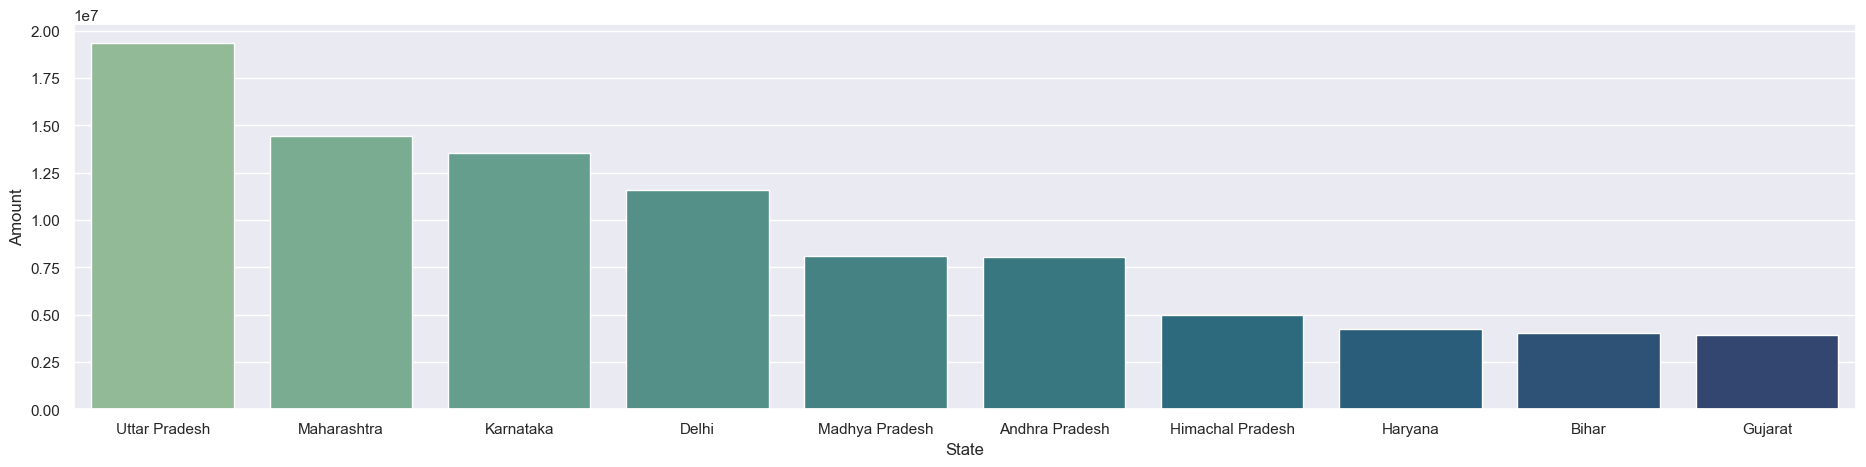

In [47]:
state_orders=data.groupby(['State'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(10) # State wise order

sns.set(rc={'figure.figsize':(23,5)})
sns.barplot(data=state_orders,x='State',y='Amount',palette='crest')

**Insights : Most of the order and amount of purchase is from UP,MH,KAR**

# Marital Status

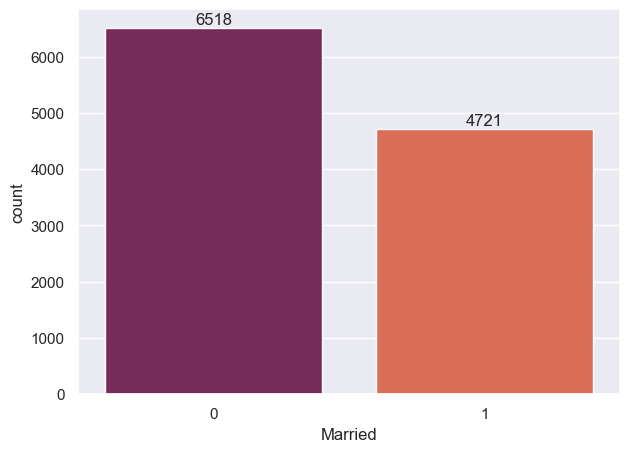

In [59]:
married_plot=sns.countplot(x='Married',data=data,palette='rocket')

sns.set(rc={'figure.figsize':(5,5)})

for val in married_plot.containers:
    married_plot.bar_label(val)
    

<Axes: xlabel='Married', ylabel='Amount'>

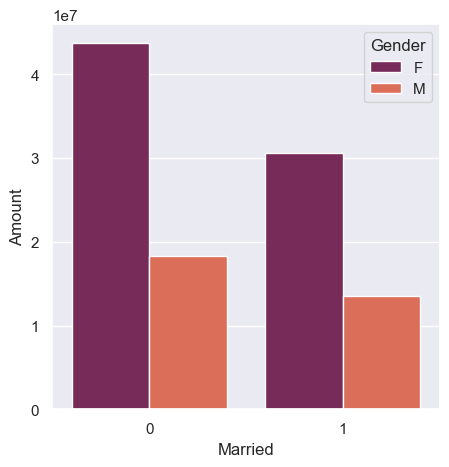

In [60]:
marriage_sale=data.groupby(['Married','Gender'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)

sns.barplot(x='Married',y='Amount',hue='Gender',data=marriage_sale,palette='rocket')

**Insights : Unmarried Woman purchase most product.And their Purchasing amount is higher.** 


# Ocupation

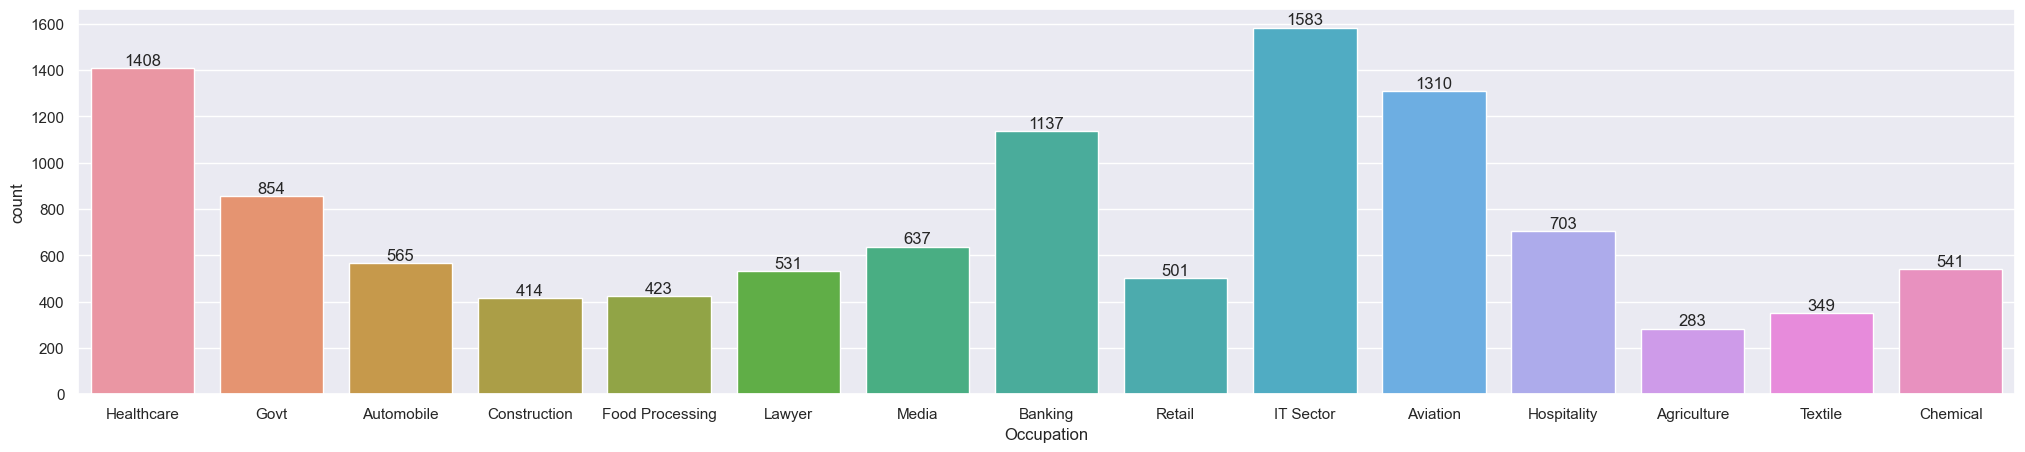

In [62]:
ocpt_plot=sns.countplot(x='Occupation',data=data)
sns.set(rc={'figure.figsize':(30,5)})
for val in ocpt_plot.containers:
    ocpt_plot.bar_label(val)

<Axes: xlabel='Occupation', ylabel='Amount'>

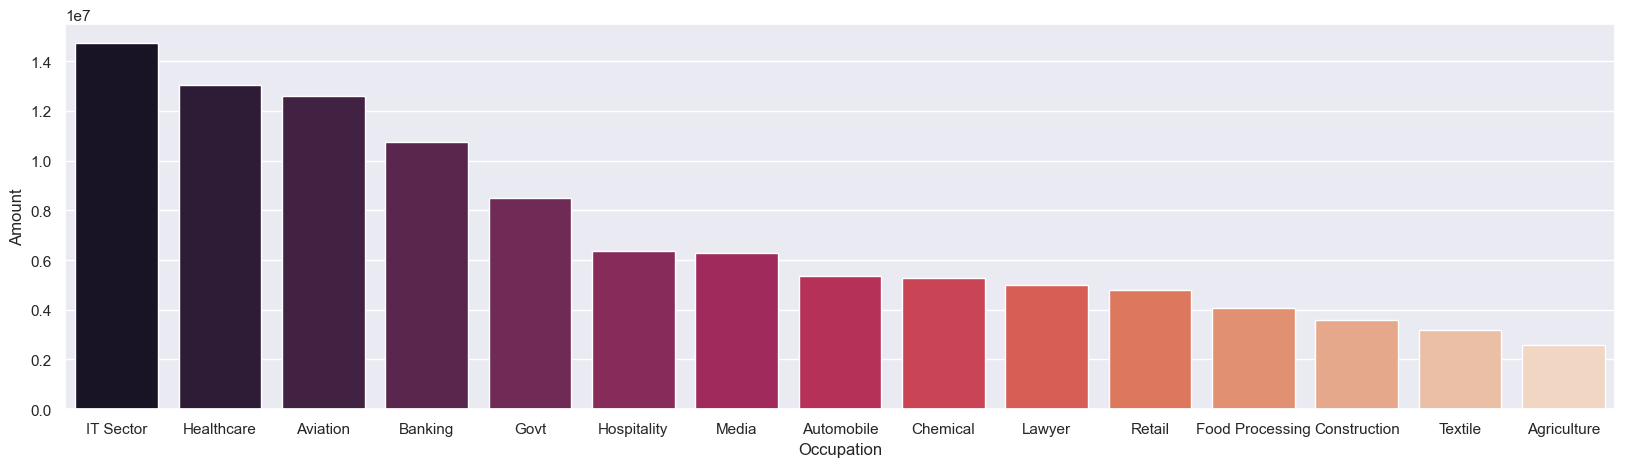

In [65]:
ocpt_sale=data.groupby(['Occupation'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sns.set(rc={'figure.figsize':(20,5)})

sns.barplot(x='Occupation',y='Amount',data=ocpt_sale,palette='rocket')

**Insights : Most Purchase From IT Sector,Healtcare,Aviation**

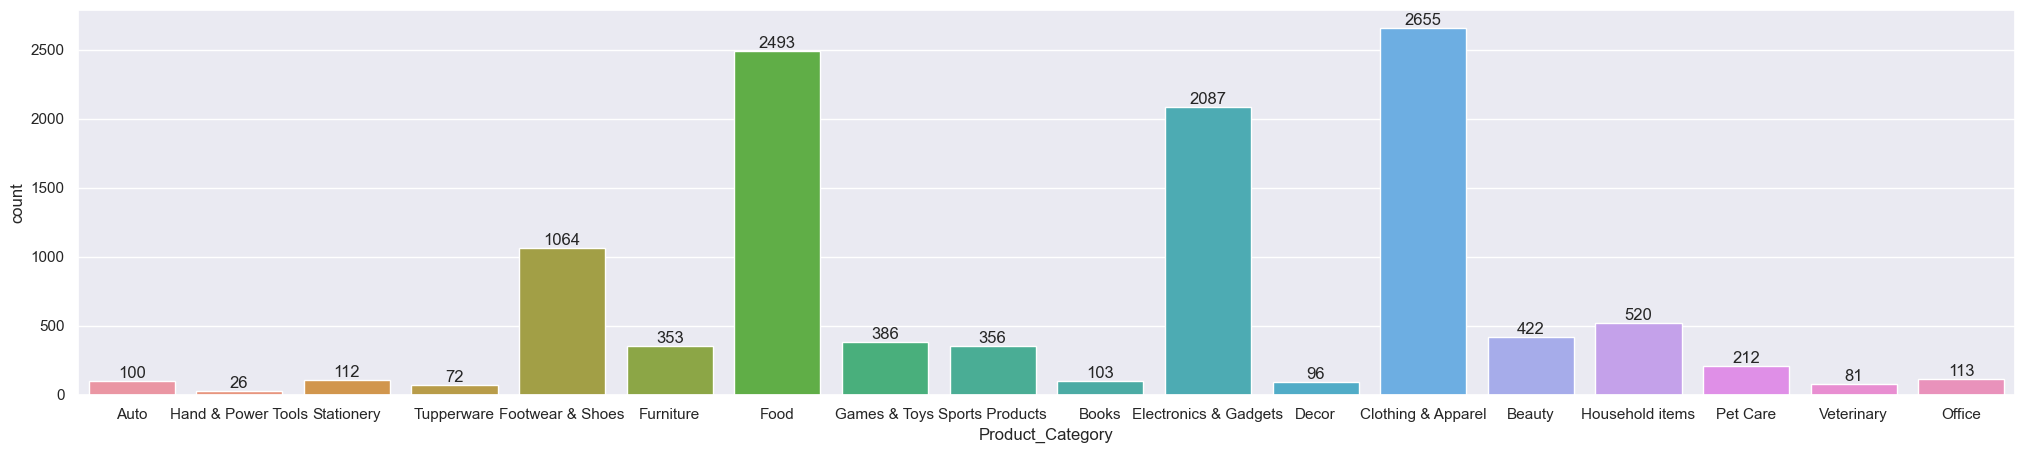

In [8]:
sns.set(rc={'figure.figsize':(25,5)})

category_plot=sns.countplot(x='Product_Category',data=data)
for val in category_plot.containers:
    category_plot.bar_label(val)


**Insights : Top 5 Selling Product Category accorind amount is Food,Cloth,Electronics,Footwear,Furniture**

**Conclusion**

*Unmarried women are group 26-35yrs from UP,Maharastra and Karnataka working in IT,Healthcare,Aviation are more like buy products from Food,Clothing
and Elecrtronics Category.*

*Thank You!*